<a href="https://www.kaggle.com/code/yutodennou/tips-get-stock-data?scriptVersionId=169532081" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a id="1"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 1. Purpose🎉 </b></div>

Get **practical time-series data** easily and improve your analytical skills. One of the most typical data is stock prices.  
With this notebook, you can easily get data on stock prices.  
Here we use **Yahoo! Finance API** as a library.  
And I also note a simple example of time-series data analysis using **Prophet**.
You can learn more about prophet from this link.
🔍 https://www.kaggle.com/code/yutodennou/tips-try-prophet-for-beginners

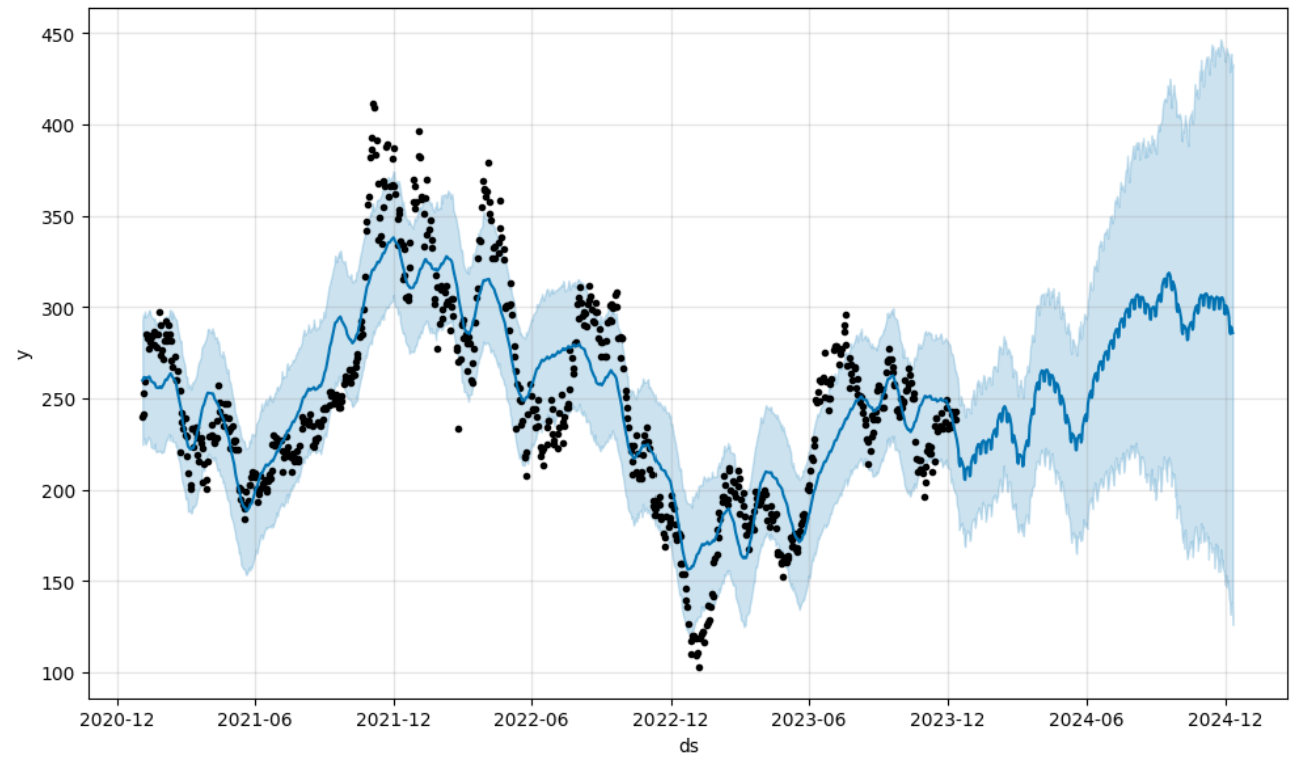

<a id="2"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 2. Import Libs🗃️ </b></div>

In [1]:
# use Yahoo! finance API 
!pip install yfinance
import yfinance as yf
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 32.5 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for peewee: filename=peewee-3.17.1-cp310-cp310-linux_x86_64.whl size=291649 sha256=544df699783d1856634f4d72093c119d067e58f0af365cb0f6f1fc4267afcd0c
  Stored in directory: /root/.cache/pip/wheels/d7/35/5c/1374782be033462df5f40174d8d879519d64ed8c25a1977554
Successfully built peewee


<a id="3"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 3. Get Market Data🔍 </b></div>

Access ticker data and it has stock info

In [2]:
target = "TSLA" # any stock name here
stock = yf.Ticker(target) # access ticker data
stock.info # get all stock info

{'address1': '1 Tesla Road',
 'city': 'Austin',
 'state': 'TX',
 'zip': '78725',
 'country': 'United States',
 'phone': '512 516 8177',
 'website': 'https://www.tesla.com',
 'industry': 'Auto Manufacturers',
 'industryKey': 'auto-manufacturers',
 'industryDisp': 'Auto Manufacturers',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehic

Historical data is contained 'Ticker.history'  
You can select period like from '[1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max]'

In [3]:
hist = stock.history(period="max") # get historical market data
stock.history_metadata # show meta information about the history

{'currency': 'USD',
 'symbol': 'TSLA',
 'exchangeName': 'NMS',
 'fullExchangeName': 'NasdaqGS',
 'instrumentType': 'EQUITY',
 'firstTradeDate': 1277818200,
 'regularMarketTime': 1711656000,
 'hasPrePostMarketData': True,
 'gmtoffset': -14400,
 'timezone': 'EDT',
 'exchangeTimezoneName': 'America/New_York',
 'regularMarketPrice': 175.79,
 'fiftyTwoWeekHigh': 179.57,
 'fiftyTwoWeekLow': 175.3,
 'regularMarketDayHigh': 179.57,
 'regularMarketDayLow': 175.3,
 'regularMarketVolume': 76893057,
 'chartPreviousClose': 1.593,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'timezone': 'EDT',
   'start': 1711612800,
   'end': 1711632600,
   'gmtoffset': -14400},
  'regular': {'timezone': 'EDT',
   'start': 1711632600,
   'end': 1711656000,
   'gmtoffset': -14400},
  'post': {'timezone': 'EDT',
   'start': 1711656000,
   'end': 1711670400,
   'gmtoffset': -14400}},
 'dataGranularity': '1d',
 'range': '',
 'validRanges': ['1d',
  '5d',
  '1mo',
  '3mo',
  '6mo',
  '1y',
  '2y',
  '5y',
  '10y',

This is the data we use for time series prediction

In [4]:
hist.head(15) # use this time series data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266666,1.666666,1.169333,1.592666,281749140,0.0,0.0
2010-06-30 00:00:00-04:00,1.730666,2.027946,1.553333,1.588666,257915910,0.0,0.0
2010-07-01 00:00:00-04:00,1.666666,1.728000,1.351333,1.464000,123251835,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77036925,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,102789510,0.0,0.0
2010-07-07 00:00:00-04:00,1.093333,1.108666,0.998666,1.053333,103873710,0.0,0.0
2010-07-08 00:00:00-04:00,1.076000,1.168000,1.038000,1.164000,115664055,0.0,0.0
2010-07-09 00:00:00-04:00,1.172000,1.193333,1.103333,1.160000,60728055,0.0,0.0
2010-07-12 00:00:00-04:00,1.196666,1.204666,1.133333,1.136666,32980830,0.0,0.0


<a id="4"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 3. Visualize Example📈 </b></div>

Using 'Prophet' below.  
If you'd like to know detail technique about the library, please refer to my notebook here:  
🔍 https://www.kaggle.com/code/yutodennou/tips-try-prophet-for-beginners  

In [5]:
!pip install prophet
from prophet import Prophet
import matplotlib.pyplot as plt

06:43:42 - cmdstanpy - INFO - Chain [1] start processing
06:43:44 - cmdstanpy - INFO - Chain [1] done processing


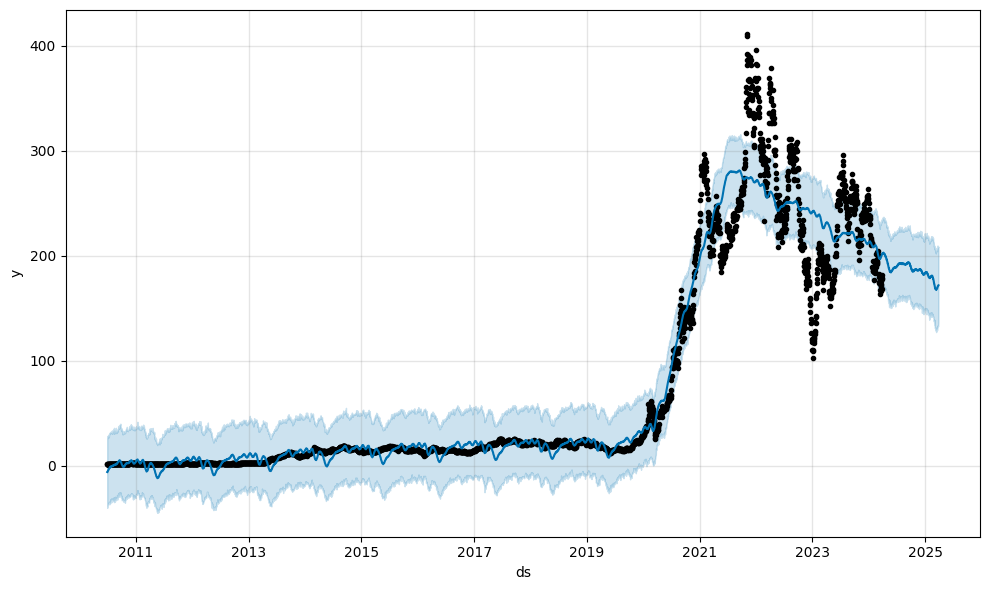

In [6]:
hist['ds'] = hist.index.copy()
hist['ds'] = hist['ds'].dt.tz_localize(None)
hist['y'] = hist['Open'].copy()
model = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=True
)
model.fit(hist)
future_df = model.make_future_dataframe(365)
forecast_df = model.predict(future_df)
model.plot(forecast_df)
plt.show()

This doesn't fit well especially from 2021.  
So, now let's focus on recent trend below: 

06:43:46 - cmdstanpy - INFO - Chain [1] start processing
06:43:46 - cmdstanpy - INFO - Chain [1] done processing


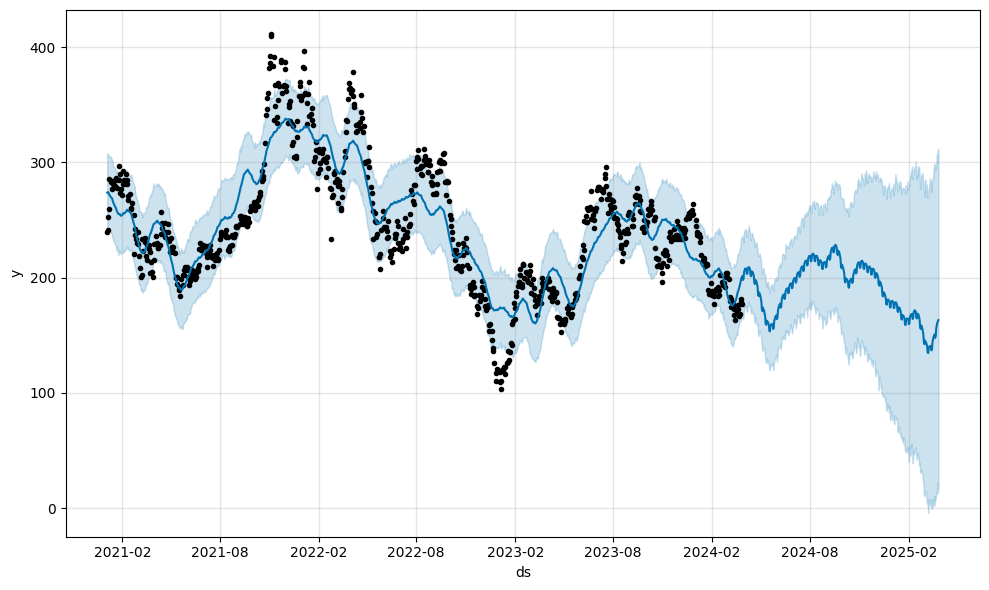

In [7]:
hist_recent = hist[hist['ds']>'2021'] # get historical market data
model = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=True
)
model.fit(hist_recent)
future_df = model.make_future_dataframe(365)
forecast_df = model.predict(future_df)
model.plot(forecast_df)
plt.show()

<a id="-"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> ✍Tips: get other information </b></div>

Ticker module has other interesting information

### Show actions

In [8]:
print('actions: ', stock.actions) # show actions
print('dividends: ', stock.dividends) # show dividends
print('splits: ', stock.splits) # show splits
print('capital gains: ', stock.capital_gains) # show capital gain

actions:                             Dividends  Stock Splits
Date                                              
2020-08-31 00:00:00-04:00        0.0           5.0
2022-08-25 00:00:00-04:00        0.0           3.0
dividends:  Series([], Name: Dividends, dtype: float64)
splits:  Date
2020-08-31 00:00:00-04:00    5.0
2022-08-25 00:00:00-04:00    3.0
Name: Stock Splits, dtype: float64
capital gains:  Series([], dtype: object)


### Share count

In [9]:
stock.get_shares_full(start="2023-01-01", end=None) # show share count

2023-01-04 00:00:00-05:00    3598259968
2023-01-06 00:00:00-05:00    3157750016
2023-02-02 00:00:00-05:00    3164100096
2023-03-16 00:00:00-04:00    3164100096
2023-03-16 00:00:00-04:00    3211770112
                                ...    
2024-03-20 00:00:00-04:00    3184790016
2024-03-20 00:00:00-04:00    3230889984
2024-03-23 00:00:00-04:00    3184790016
2024-03-23 00:00:00-04:00    3220960000
2024-03-27 00:00:00-04:00    3184790016
Length: 106, dtype: int64

### Income statement

In [10]:
stock.get_income_stmt() # get income statement

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
TaxEffectOfUnusualItems,0.0,-14080000.0,2970000.0,0.0
TaxRateForCalcs,0.21,0.08,0.11,0.25
NormalizedEBITDA,14796000000.0,17833000000.0,9598000000.0,4224000000.0
TotalUnusualItems,0.0,-176000000.0,27000000.0,0.0
TotalUnusualItemsExcludingGoodwill,0.0,-176000000.0,27000000.0,0.0
NetIncomeFromContinuingOperationNetMinorityInterest,14999000000.0,12583000000.0,5524000000.0,721000000.0
ReconciledDepreciation,4667000000.0,3747000000.0,2911000000.0,2322000000.0
ReconciledCostOfRevenue,79113000000.0,60609000000.0,40217000000.0,24906000000.0
EBITDA,14796000000.0,17657000000.0,9625000000.0,4224000000.0
EBIT,10129000000.0,13910000000.0,6714000000.0,1902000000.0


In [11]:
# show financials:
# - income statement
print('income statement: ', stock.income_stmt)
print('4q income statement: ', stock.quarterly_income_stmt)
# - balance sheet
print('balance sheet: ', stock.balance_sheet)
print('4q balance sheet: ', stock.quarterly_balance_sheet)
# - cash flow statement
print('cashflow: ', stock.cashflow)
print('4q cashflow: ', stock.quarterly_cashflow)

income statement:                                                         2023-12-31  \
Tax Effect Of Unusual Items                                   0.0   
Tax Rate For Calcs                                           0.21   
Normalized EBITDA                                   14796000000.0   
Total Unusual Items                                           0.0   
Total Unusual Items Excluding Goodwill                        0.0   
Net Income From Continuing Operation Net Minori...  14999000000.0   
Reconciled Depreciation                              4667000000.0   
Reconciled Cost Of Revenue                          79113000000.0   
EBITDA                                              14796000000.0   
EBIT                                                10129000000.0   
Net Interest Income                                   910000000.0   
Interest Expense                                      156000000.0   
Interest Income                                      1066000000.0   
Normalized Inco

### Major holders

In [12]:
stock.major_holders # show holders

Breakdown,Value
insidersPercentHeld,0.13000
institutionsPercentHeld,0.45771
institutionsFloatPercentHeld,0.52610
institutionsCount,3898.00000


### Earnings dates

In [13]:
# Show future and historic earnings dates, returns at most next 4 quarters and last 8 quarters by default. 
# Note: If more are needed use msft.get_earnings_dates(limit=XX) with increased limit argument.
stock.earnings_dates

,EPS Estimate,Reported EPS,Surprise(%)
Earnings Date,,,
2025-01-22 16:00:00-05:00,NaN,NaN,NaN
2024-10-16 06:00:00-04:00,NaN,NaN,NaN
2024-07-17 06:00:00-04:00,NaN,NaN,NaN
2024-04-17 06:00:00-04:00,0.56,NaN,NaN
2024-01-24 16:00:00-05:00,0.74,0.71,-0.0439
2023-10-18 16:00:00-04:00,0.72,0.66,-0.0825
2023-07-19 16:00:00-04:00,0.82,0.91,0.1063
2023-04-19 16:00:00-04:00,0.85,0.85,-0.0004
2023-01-25 16:00:00-05:00,1.13,1.19,0.0555


### Options

In [14]:
stock.options # show options expirations

('2024-04-05',
 '2024-04-12',
 '2024-04-19',
 '2024-04-26',
 '2024-05-03',
 '2024-05-17',
 '2024-06-21',
 '2024-07-19',
 '2024-08-16',
 '2024-09-20',
 '2024-10-18',
 '2024-11-15',
 '2024-12-20',
 '2025-01-17',
 '2025-03-21',
 '2025-06-20',
 '2025-09-19',
 '2025-12-19',
 '2026-01-16',
 '2026-06-18',
 '2026-12-18')

### News

In [15]:
stock.news # show news

[{'uuid': '99adaad4-c780-3ff8-a19b-3a2a36d60054',
  'title': "Dow Jones Futures: Will Market Rally On 'Good' Inflation Data? Nvidia AI Chip Peer Works On Base",
  'publisher': "Investor's Business Daily",
  'link': 'https://finance.yahoo.com/m/99adaad4-c780-3ff8-a19b-3a2a36d60054/dow-jones-futures%3A-will.html',
  'providerPublishTime': 1711849287,
  'type': 'STORY',
  'thumbnail': {'resolutions': [{'url': 'https://s.yimg.com/uu/api/res/1.2/HZeoJ8.sK4ZIqdhuKhGSLQ--~B/aD01NzI7dz0xMTE5O2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/ibd.com/67d8022baa795c37d0fdd029d7ce1dcb',
     'width': 1119,
     'height': 572,
     'tag': 'original'},
    {'url': 'https://s.yimg.com/uu/api/res/1.2/DVPMLsggGc9e.v5q0S5vOQ--~B/Zmk9ZmlsbDtoPTE0MDtweW9mZj0wO3c9MTQwO2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/ibd.com/67d8022baa795c37d0fdd029d7ce1dcb',
     'width': 140,
     'height': 140,
     'tag': '140x140'}]},
  'relatedTickers': ['NVDA', '^DJI', 'COMP', '^GSPC', 'TSLA', 'MSFT', 'CRWD']},
 {'uuid': 